# Graph Learning

In [1]:
%pylab inline
import pandas as pd
import pickle as pkl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from mat_adj import Adj , file , U_synth

In [3]:
def selfN(x,B,C):
    return -B*x + C*tanh(x)

## Dynamics in general

We know that for any graph system, the node signals follow:

$$
 \frac{d \vec{x}}{dt} = M_0(\vec{x}) + diag(M_1(\vec{x}))A M_2(\vec{x}) 
$$

Using these dynamics, it should be theoretically possible to learn back the adjacency matrix of the network that produced the signals.   

In [4]:
Dynamics = { "R1": (lambda x: -1*x , lambda x: ones(len(x)) , lambda x: x/(1+x)) , "R2":(lambda x: -(x)**(0.4) , lambda x: ones(len(x))  , lambda x: (x**(0.2)/(1 + x**(0.2)))), "P":(lambda x: - x**(0.5) , lambda x: ones(len(x))  , lambda x: x**(0.2)) , "M":(lambda x: x(1- x*x) , lambda x: x , lambda x: x/(1+x)) , "E":(lambda x: -1*x , lambda x: x**(0.5) , lambda x: x**2) , "N":(selfN , lambda x: ones(len(x))  , lambda x: tanh(x)) }

In [5]:
Type = "R1"
M0 = Dynamics[Type][0]
M1 = Dynamics[Type][1]
M2 = Dynamics[Type][2]

In [6]:
N = 21
T = 1000
A_gt = pkl.load(open("./Adj.pkl","rb"))

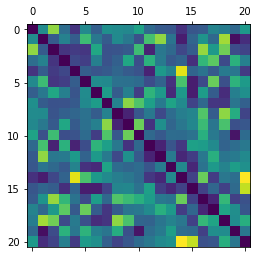

In [7]:
matshow(A_gt)

In [8]:
dt = 0.01
x0 = abs(randn(N,))
x0

array([0.24589741, 0.1703922 , 0.34838615, 1.68900694, 1.14360681,
       0.28504913, 0.90158303, 1.87816296, 0.09030791, 0.41677673,
       0.20012329, 0.73911252, 0.8665156 , 1.96438767, 0.55681126,
       2.14550833, 0.07282   , 1.40998714, 0.90812481, 0.0446292 ,
       0.74796474])

In [9]:
x = x0
Traj = []

for i in range(T):
    Traj.append(x)
    x = x + (M0(x) + dot(diag(M1(x)), dot(A_gt,M2(x))))*dt

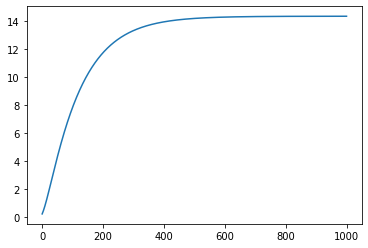

In [10]:
plot([(Traj[i])[0] for i in range(T)])

In [11]:
k = 4
samples = [Traj[k*i] for i in range(T//k)]
derivs = [(samples[i+1] - samples[i])/(k*dt) for i in range(T//k - 1)]

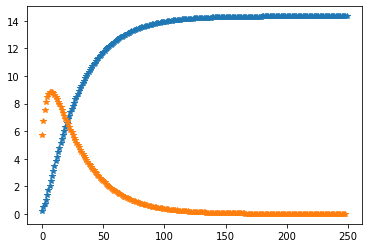

In [12]:
plot(array(samples)[:,0],"*")
plot([i for i in range(T//k - 1)], array(derivs)[:,0],"*")